<a href="https://colab.research.google.com/github/Habonit/sparta_coding_ai/blob/main/week4_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -qU datasets torchinfo

# DistilBert fine-tuning

- 1. Task:

- 2. 더 해볼 과제:

- 3. 특이 사항:


## [My Code] Data Load


### [My Code] Model Config

In [1]:
import torch
# 모델 config입니다.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_name = "distilbert-base-uncased"
ds_name = "nyu-mll/glue"
ds_config = "mnli"

n_labels = 3

test_size = 0.5
random_state = 42
batch_size = 64
max_len = 400

results_dir = './results/week4_basic'
lr = 2e-5
n_epochs = 10

### [My Code] Load Data and split it into Train, Val, Test

In [5]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from datasets import load_dataset
import pandas as pd

# Parquet 형태의 데이터셋입니다.
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=n_labels)
model = model.to(device)
raw_dataset = load_dataset(ds_name, ds_config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/52.2M [00:00<?, ?B/s]

(…)alidation_matched-00000-of-00001.parquet:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

(…)dation_mismatched-00000-of-00001.parquet:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

test_matched-00000-of-00001.parquet:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

test_mismatched-00000-of-00001.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

In [6]:
import torch
from torchinfo import summary
# 모델 정보 출력
# 더미 입력 데이터
vocab_size = len(tokenizer)
dummy_input_ids = torch.randint(0, vocab_size, (batch_size, max_len))  # 랜덤한 input_ids
dummy_attention_mask = torch.ones(batch_size, max_len, dtype=torch.int64)  # attention_mask: 모든 값이 1

# 모델 요약 출력
print("Model Summary")
print("Vocab_size ", vocab_size)
print("Input Shape ", dummy_input_ids.shape)
print("Attention_Mask Shape ", dummy_attention_mask.shape)
print(summary(model, input_data={"input_ids": dummy_input_ids.to(device), "attention_mask": dummy_attention_mask.to(device)}))

Model Summary
Vocab_size  30522
Input Shape  torch.Size([64, 400])
Attention_Mask Shape  torch.Size([64, 400])
Layer (type:depth-idx)                                  Output Shape              Param #
DistilBertForSequenceClassification                     [64, 3]                   --
├─DistilBertModel: 1-1                                  [64, 400, 768]            --
│    └─Embeddings: 2-1                                  [64, 400, 768]            --
│    │    └─Embedding: 3-1                              [64, 400, 768]            23,440,896
│    │    └─Embedding: 3-2                              [1, 400, 768]             393,216
│    │    └─LayerNorm: 3-3                              [64, 400, 768]            1,536
│    │    └─Dropout: 3-4                                [64, 400, 768]            --
│    └─Transformer: 2-2                                 [64, 400, 768]            --
│    │    └─ModuleList: 3-5                             --                        42,527,232
├─Linear: 

In [7]:
for param in model.distilbert.parameters():
    param.requires_grad = False

print("Model Summary")
print("Vocab_size ", vocab_size)
print("Input Shape ", dummy_input_ids.shape)
print("Attention_Mask Shape ", dummy_attention_mask.shape)
print(summary(model, input_data={"input_ids": dummy_input_ids.to(device), "attention_mask": dummy_attention_mask.to(device)}))

Model Summary
Vocab_size  30522
Input Shape  torch.Size([64, 400])
Attention_Mask Shape  torch.Size([64, 400])
Layer (type:depth-idx)                                  Output Shape              Param #
DistilBertForSequenceClassification                     [64, 3]                   --
├─DistilBertModel: 1-1                                  [64, 400, 768]            --
│    └─Embeddings: 2-1                                  [64, 400, 768]            --
│    │    └─Embedding: 3-1                              [64, 400, 768]            (23,440,896)
│    │    └─Embedding: 3-2                              [1, 400, 768]             (393,216)
│    │    └─LayerNorm: 3-3                              [64, 400, 768]            (1,536)
│    │    └─Dropout: 3-4                                [64, 400, 768]            --
│    └─Transformer: 2-2                                 [64, 400, 768]            --
│    │    └─ModuleList: 3-5                             --                        (42,527,232)
├─

In [8]:
def tokenize(batch, max_len):

  return tokenizer(
    batch["premise"],
    batch['hypothesis'],
    padding="max_length",
    max_length = max_len,
    truncation="longest_first" ,
    return_tensors = 'pt')

# ds = raw_dataset['train']
ds = raw_dataset['train'].select(range(100))
ds = ds.map(lambda batch: tokenize(batch, max_len), batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [9]:
from datasets import DatasetDict


train_test_split = ds.train_test_split(test_size=0.1)
test_data = train_test_split['test']
train_data = train_test_split['train']
train_val_split = train_data.train_test_split(test_size=0.3333)
train_data = train_val_split['train']
val_data = train_val_split['test']

dataset_dict = {
    'train': train_data,
    'val': val_data,
    'test': test_data,
}

dataset = DatasetDict(dataset_dict)
dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 60
    })
    val: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 30
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [10]:
# sample을 확인하는 함수입니다.
def sample_check(type, num):

    print("Sample_Idx: ", dataset[type]['idx'][num], end="\n\n")

    print("Sample_label: ", dataset[type]['label'][num], end="\n\n")

    print("Sample_premise ", dataset[type]['premise'][num], end="\n\n")

    print("Sample_hypothesis: ", dataset[type]['hypothesis'][num], end="\n\n")

sample_check(type = 'train', num = 3)

Sample_Idx:  66

Sample_label:  2

Sample_premise  If, however, the evaluation question requires GAO to report on how satisfactory progress is or the reasons for problems in implementation, the more staff who can be on site over time, with the ricHe'st or thickest base for examining the situation as the many people involved see it, the sounder our causal conclusions and subsequent recommendations will be.

Sample_hypothesis:  If the GAO has to report on the progress, the recommendations will be much poorer quality.



### [My Code] 텍스트 길이 분포 계산


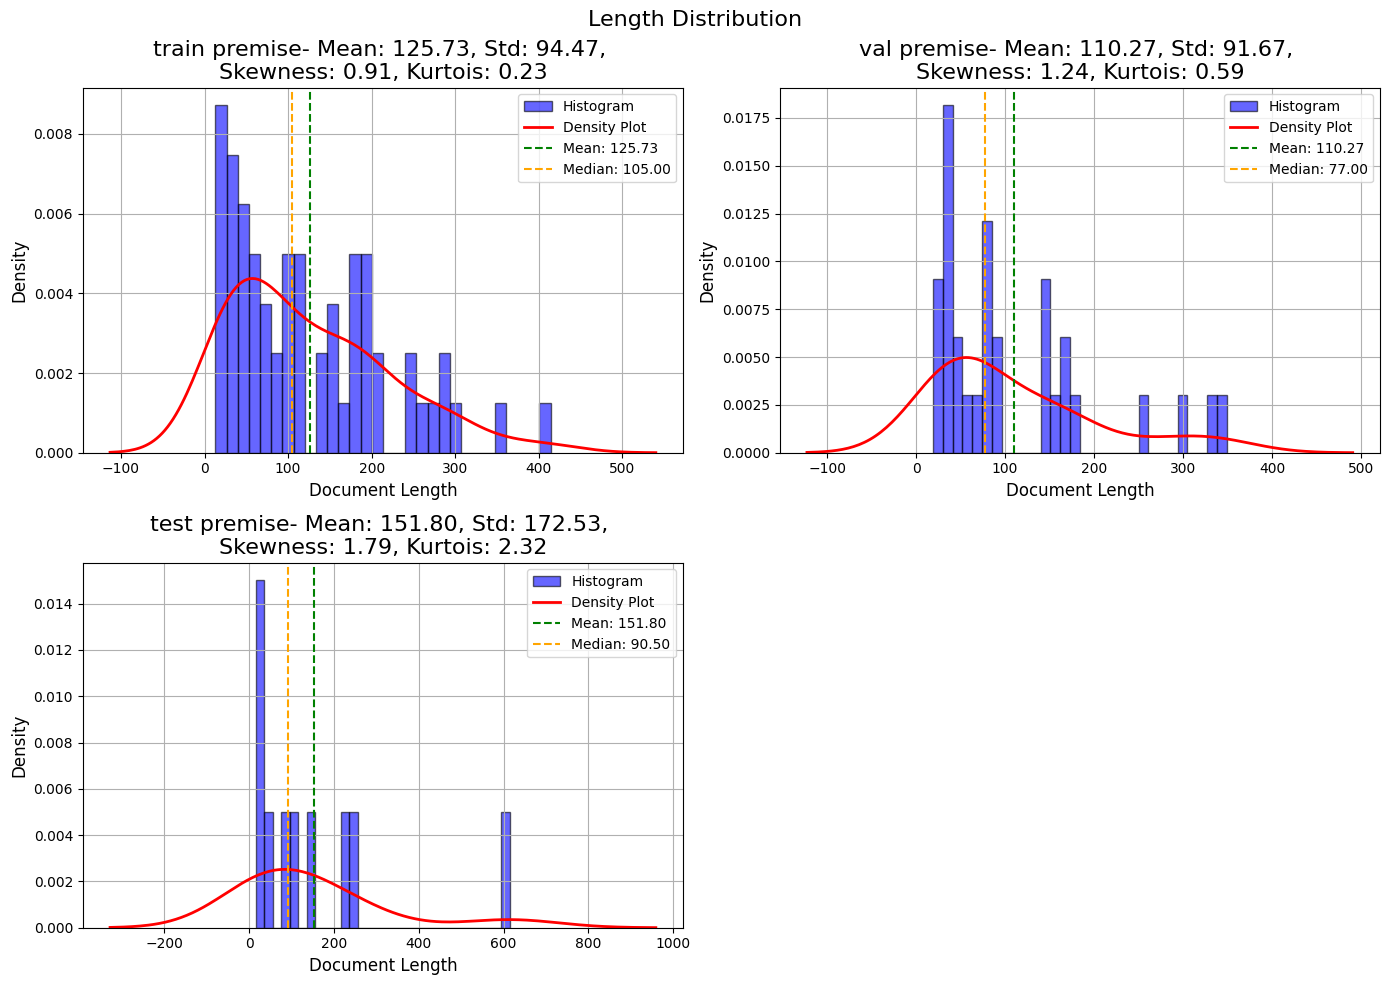

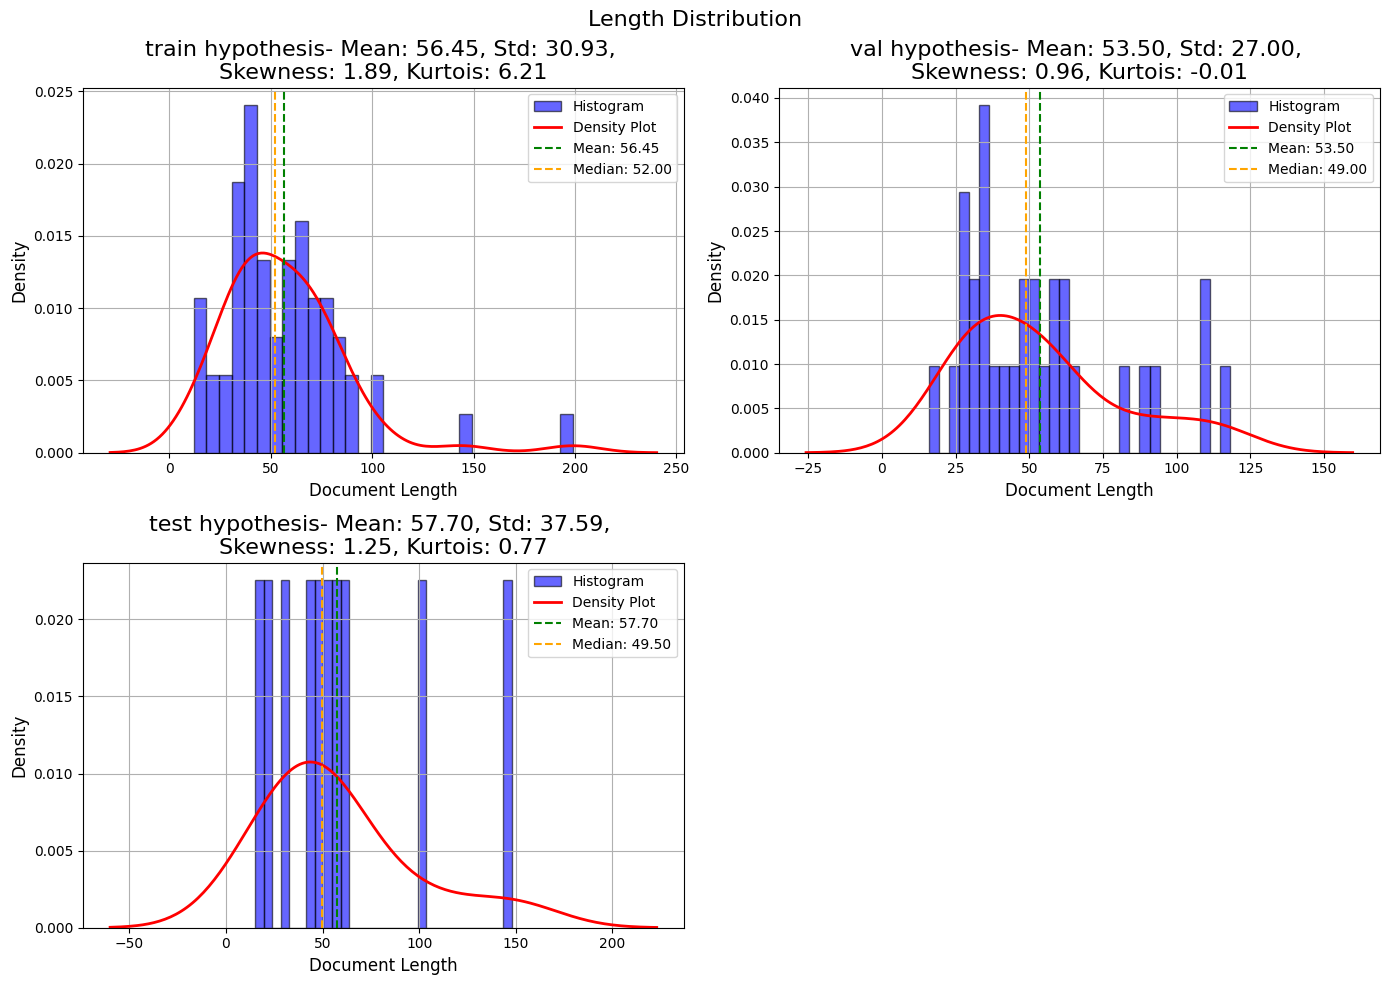

In [11]:
# 평균, 표준편차, 왜도, 첨도 계산
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis

def length_plot(data, name):
    plt.hist(data, bins=30, alpha=0.6, label=f'Histogram', color='blue', edgecolor='black', density=True)
    sns.kdeplot(data, label=f'Density Plot', color='red', linewidth=2)

    mean_value = np.mean(data)
    mean_value = np.mean(data)
    std_dev = np.std(data)
    skewness = skew(data)
    kurt = kurtosis(data)
    median_value = np.median(data)

    plt.axvline(mean_value, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='orange', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')
    plt.title(f'{name}- Mean: {mean_value:.2f}, Std: {std_dev:.2f}, \nSkewness: {skewness:.2f}, Kurtois: {kurt:.2f}', fontsize=16)
    plt.xlabel('Document Length', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True)

def final_plotting(type):
    plt.figure(figsize=(14,10))
    for i, name in enumerate(['train', 'val', 'test']):
        plt.subplot(2,2,i+1)
        length_plot([len(data)for data in dataset[name][type]], name+" "+type)
    plt.suptitle("Length Distribution", fontsize=16)
    plt.tight_layout()
    plt.show()

final_plotting('premise')

final_plotting('hypothesis')

### 1.4 [My Code] Label Distribution

In [12]:
# text: a string feature.
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.DataFrame(
    [
        pd.Series(dataset['train']['label']).value_counts(normalize=True).sort_index(),
        pd.Series(dataset['val']['label']).value_counts(normalize=True).sort_index(),
        pd.Series(dataset['test']['label']).value_counts(normalize=True).sort_index(),
    ],
    index = ['train','val','test'],
)

display(df)

,0,1,2
train,0.383333,0.2,0.416667
val,0.266667,0.4,0.333333
test,0.400000,0.4,0.200000


## [My Code] Training

In [13]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [14]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# compute metrics은 반드시 아래와 같이 dict의 형태로 나와야 합니다.
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(predictions, labels)
    f1 = f1_score(predictions, labels, average="weighted")
    precision = precision_score(predictions, labels, average="weighted")
    recall = recall_score(predictions, labels, average="weighted")
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
        }

training_args = TrainingArguments(
    output_dir=results_dir,
    num_train_epochs=n_epochs,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    logging_dir=results_dir,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    report_to="none"
)

In [15]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["val"],
    compute_metrics=compute_metrics,
    data_collator = data_collator
)

In [16]:
# 테스트 데이터셋에 대한 예측과 평가를 진행합니다.
initial_test_metrics = trainer.predict(test_dataset=dataset["test"])
initial_metrics = initial_test_metrics.metrics
print(f"Test Metrics:", "\n",
      "loss: ", initial_metrics['test_loss'], "\n",
      "accuracy: ", initial_metrics['test_accuracy'], "\n",
      "f1:", initial_metrics['test_f1'], "\n",
      "precision: ", initial_metrics['test_precision'], "\n",
      "recall:", initial_metrics['test_recall']
      )

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Metrics: 
 loss:  1.093324899673462 
 accuracy:  0.5 
 f1: 0.619047619047619 
 precision:  0.875 
 recall: 0.5


In [17]:
trainer.train()

Epoch,Training Loss,Validation Loss,Model Preparation Time,Accuracy,F1,Precision,Recall
1,1.094900,1.100369,0.001800,0.300000,0.339259,0.431667,0.300000
2,1.094000,1.103839,0.001800,0.300000,0.386717,0.565000,0.300000
3,1.081100,1.107175,0.001800,0.300000,0.386717,0.565000,0.300000
4,1.087100,1.110285,0.001800,0.300000,0.386717,0.565000,0.300000
5,1.079500,1.113041,0.001800,0.300000,0.386717,0.565000,0.300000
6,1.061300,1.115408,0.001800,0.300000,0.386717,0.565000,0.300000
7,1.072400,1.117318,0.001800,0.300000,0.386717,0.565000,0.300000
8,1.053300,1.118757,0.001800,0.300000,0.387500,0.580000,0.300000
9,1.066400,1.119714,0.001800,0.300000,0.387475,0.595000,0.300000
10,1.057600,1.120191,0.001800,0.300000,0.387475,0.595000,0.300000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

TrainOutput(global_step=10, training_loss=1.0747604608535766, metrics={'train_runtime': 9.8702, 'train_samples_per_second': 60.789, 'train_steps_per_second': 1.013, 'total_flos': 62095200480000.0, 'train_loss': 1.0747604608535766, 'epoch': 10.0})

## [My Code] Metric Plotting

In [18]:
# 테스트 데이터셋에 대한 예측과 평가를 진행합니다.
test_metrics = trainer.predict(test_dataset=dataset["test"])
metrics = test_metrics.metrics
print(f"Test Metrics:", "\n",
      "loss: ", metrics['test_loss'], "\n",
      "accuracy: ", metrics['test_accuracy'], "\n",
      "f1:", metrics['test_f1'], "\n",
      "precision: ", metrics['test_precision'], "\n",
      "recall:", metrics['test_recall']
      )

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Metrics: 
 loss:  1.111904501914978 
 accuracy:  0.2 
 f1: 0.32727272727272727 
 precision:  0.9 
 recall: 0.2


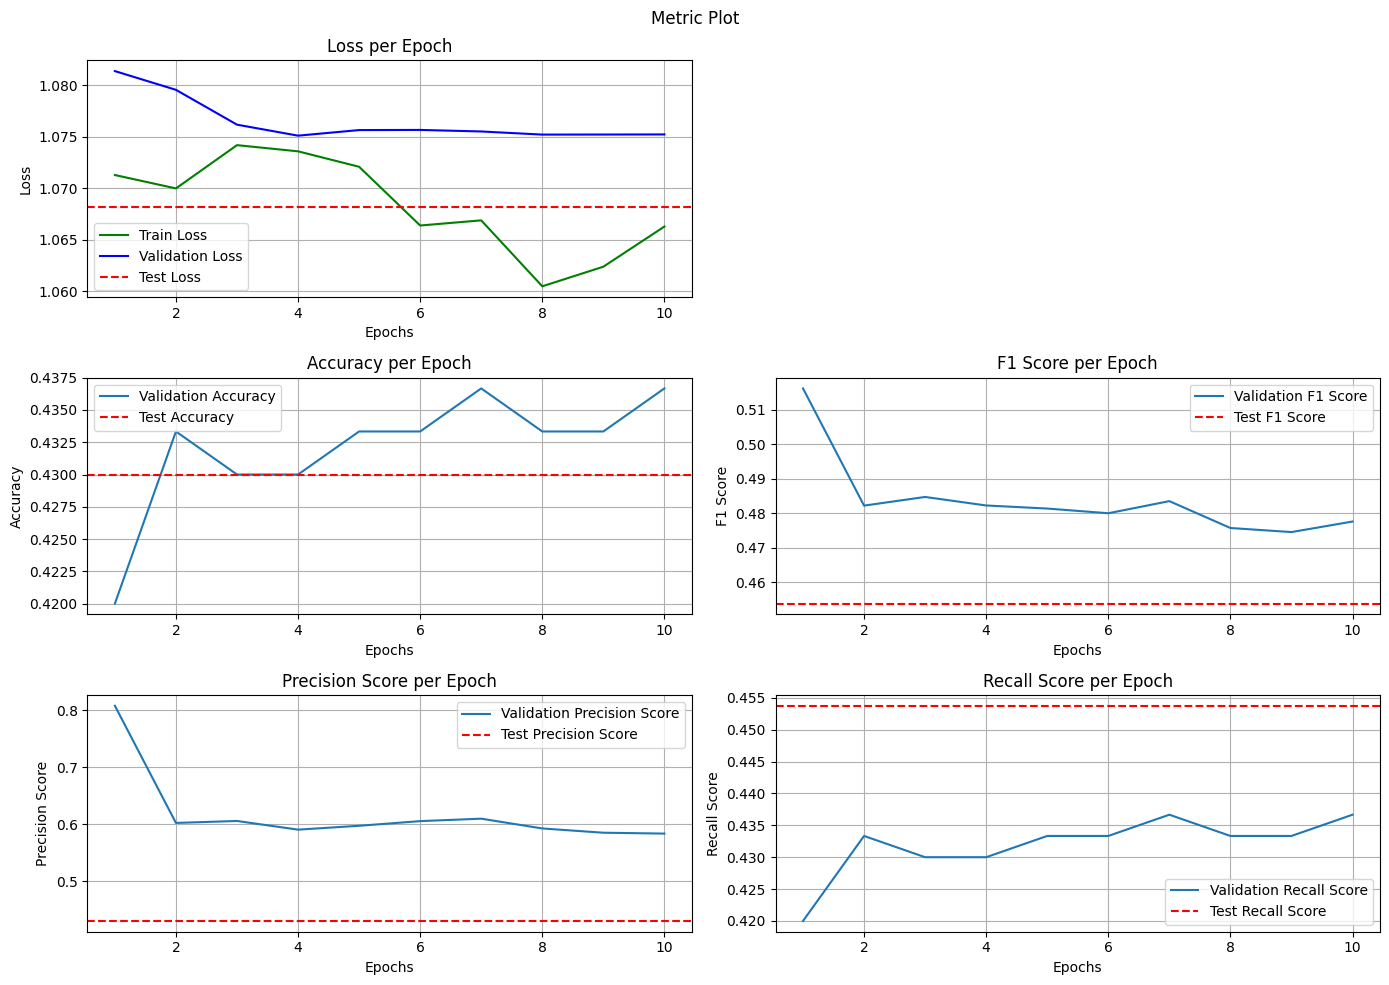

In [ ]:
import matplotlib.pyplot as plt

def plotting():
    # 로그 데이터 추출
    log_history = trainer.state.log_history

    # 메트릭 초기화
    epochs = []
    train_loss = []
    val_loss = []
    val_accuracy = []
    val_f1 = []
    val_precision = []
    val_recall = []

    # 로그 데이터 분리
    for log in log_history:
        if 'epoch' in log:
            current_epoch = log['epoch']
            if current_epoch not in epochs:
                epochs.append(current_epoch)
            if 'loss' in log:
                train_loss.append(log['loss'])
            if 'eval_loss' in log:
                val_loss.append(log['eval_loss'])
            if 'eval_accuracy' in log:
                val_accuracy.append(log['eval_accuracy'])
            if 'eval_f1' in log:
                val_f1.append(log['eval_f1'])
            if 'eval_precision' in log:
                val_precision.append(log['eval_precision'])
            if 'eval_recall' in log:
                val_recall.append(log['eval_recall'])

    test_loss = metrics['test_loss']
    test_accuracy = metrics['test_accuracy']
    test_f1 = metrics['test_f1']
    test_precision = metrics['test_accuracy']
    test_recall = metrics['test_f1']

    # 플로팅
    plt.figure(figsize=(14, 10))

    # 손실 플롯
    plt.subplot(3, 2, 1)
    plt.plot(epochs, train_loss, color = 'g', label='Train Loss')
    plt.plot(epochs, val_loss, color = 'b', label='Validation Loss')
    plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()
    plt.grid(True)

    # 정확도 및 F1 스코어 플롯
    plt.subplot(3, 2, 3)
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 4)
    plt.plot(epochs, val_f1, label='Validation F1 Score')
    plt.axhline(y=test_f1, color='r', linestyle='--', label='Test F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.title('F1 Score per Epoch')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 5)
    plt.plot(epochs, val_precision, label='Validation Precision Score')
    plt.axhline(y=test_precision, color='r', linestyle='--', label='Test Precision Score')
    plt.xlabel('Epochs')
    plt.ylabel('Precision Score')
    plt.title('Precision Score per Epoch')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 6)
    plt.plot(epochs, val_recall, label='Validation Recall Score')
    plt.axhline(y=test_recall, color='r', linestyle='--', label='Test Recall Score')
    plt.xlabel('Epochs')
    plt.ylabel('Recall Score')
    plt.title('Recall Score per Epoch')
    plt.legend()
    plt.grid(True)

    plt.suptitle(f"Metric Plot")
    plt.tight_layout()
    print("\n\n")

plotting()
plt.show()

In [ ]:
def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# 학습 가능한 파라미터 수 출력
trainable_params_lst = count_trainable_parameters(model)
train_runtime_lst = trainer.state.log_history[-1]['train_runtime']

result_df = pd.DataFrame([metrics])
initial_result_df = pd.DataFrame([initial_metrics])

result_df = pd.concat([result_df, initial_result_df], axis=0)
result_df.index = ['trained_model_metrics','initial_metrics']
result_df['trainable_parameters']  = trainable_params_lst
result_df['train_runtime'] = train_runtime_lst
result_df[['test_loss','test_accuracy','test_f1','trainable_parameters', 'train_runtime', 'test_runtime']]

,test_loss,test_accuracy,test_f1,trainable_parameters,train_runtime,test_runtime
trained_model_metrics,1.068156,0.43,0.453753,592899,76.2918,0.8668
initial_metrics,1.068156,0.43,0.453753,592899,76.2918,0.8766


## [My Code] Conclusion

In [ ]:
!huggingface-cli login

In [134]:
prompt_template = """
# Context #

You are assisting with the MNLI (Multi-Genre Natural Language Inference) task, which involves classifying whether the premise entails the hypothesis in a binary format.

# Objective #

Perform binary classification to determine if the {task_name} is true, respond TRUE. Otherwise respond FALSE.
In other words, {task}

# Task #

{task}

# Style #

Concise and strict.

# Tone #

Neutral and objective.

# Audience #

A technical user focused on binary classification.

# Response_format #

Provide your response in the format:
"Classification: True/False"

# Example #

{example_positive}

{example_negative}

##########

Please classify the following:

Premise: "{premise}"
Hypothesis: "{hypothesis}"
Classification:

"""

In [135]:
definition = {
  "entailment": {
    "task_name": "Determine entailment",
    "task": "Determine if the premise entails the hypothesis. If the premise is true, the hypothesis must also be true.",
    "examples": {
      "positive": """
        Premise: "A cat is sleeping on the couch."
        Hypothesis: "An animal is sleeping on the couch."
        Classification: True
      """,
      "negative": """
        Premise: "The child is playing outside."
        Hypothesis: "The child is sitting inside."
        Classification: False
      """
    }
  },
  "neutral": {
    "task_name": "Determine neutrality",
    "task": "Determine if the premise is neutral with respect to the hypothesis. If the premise is true, the truth of the hypothesis cannot be determined.",
    "examples": {
      "positive": """
        Premise: "A man is walking in the park."
        Hypothesis: "The man is wearing a hat."
        Classification: True
      """,
      "negative": """
        Premise: "A cat is sleeping on the couch."
        Hypothesis: "An animal is sleeping on the couch."
        Classification: False
      """
    }
  },
  "contradiction": {
    "task_name": "Determine contradiction",
    "task": "Determine if the premise contradicts the hypothesis. If the premise is true, the hypothesis must necessarily be false.",
    "examples": {
      "positive": """
        Premise: "The child is playing outside."
        Hypothesis: "The child is sitting inside."
        Classification: True
      """,
      "negative": """
        Premise: "A dog is barking loudly."
        Hypothesis: "The dog is completely silent."
        Classification: False
      """
    }
  }
}


In [136]:
text_model_dict = {
    "llama": {
        "name" : "meta-llama/Llama-3.2-3B",
        "device" : 'auto',
        "generation_params": {
            "max_new_tokens" : 64,
            "temperature": 0.5,
            "top_p": 0.9,
            "top_k": 10,
            "no_repeat_ngram_size": 2,
            "repetition_penalty": 1.2,
            "early_stopping":True
        }
    },
    "mistral": {
        "name" : "mistralai/Mistral-7B-Instruct-v0.3",
        "device" : 'auto',
        "generation_params": {
            "max_new_tokens" : 8,
            "temperature": 0.7,
            "top_p": 0.9,
            "top_k": 10,
            "no_repeat_ngram_size": 2,
            "repetition_penalty": 1.2,
            "early_stopping":True
        }
    }
}

In [137]:
from torch import nn
import torch
from transformers import pipeline

class Llama(nn.Module):
    def __init__(self, config):
        super(Llama, self).__init__()
        self.config = config
        self.pipe = pipe = pipeline(
            "text-generation",
            model=self.config['name'],
            torch_dtype=torch.bfloat16,
            device_map=self.config['device']
        )

        self.generation_params = self.config['generation_params']

    def forward(self, prompt):
        return self.pipe(prompt, **self.generation_params)

In [138]:
class Mistral(nn.Module):
    def __init__(self, config):
        super(Mistral, self).__init__()
        self.config = config
        self.pipe = pipeline(
            "text-generation",
            model=self.config['name'],
            torch_dtype=torch.bfloat16,
            device_map=self.config['device']
        )
        self.generation_params = self.config['generation_params']

    def forward(self, prompt):
        messages = [
            # {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
            {"role": "user", "content": prompt},
        ]
        return self.pipe(prompt, **self.generation_params)

In [139]:
a = [{"gsg":123}]
b = f"{a}"
print(b)

[{'gsg': 123}]


In [140]:
class LlmClassifier(nn.Module):
    def __init__(self, config):
        super(LlmClassifier, self).__init__()
        self.config = config
        self.llama = Llama(self.config['llama'])
        self.mistral = Mistral(self.config['mistral'])

        self.result_dict = {
            "entailment":0,
            "neutral":0,
            "contradiction":0
            }

    @staticmethod
    def _get_prompt(premise, hypothesis, prompt_template, definition, label):
        task_name = definition[label]['task_name']
        task = definition[label]['task']
        example_positive = definition[label]['examples']['positive']
        example_negative = definition[label]['examples']['negative']
        prompt = prompt_template.format(
            task = task,
            task_name = task_name,
            example_positive = example_positive,
            example_negative = example_negative,
            premise = premise,
            hypothesis = hypothesis
        )
        return prompt

    @staticmethod
    def _label_calculator(output, label, result_dict):
        output = f"{output}"
        output = output.split("######")[-1]
        print(label)
        print(output)
        if label == 'entailment' and 'True' in output:
            result_dict['entailment'] += 1
        elif label == 'neutral' and 'True' in output:
            result_dict['neutral'] += 1
        elif label == 'contradiction' and 'True' in output:
            result_dict['contradiction'] += 1
        return result_dict

    def forward(self, premise, hypothesis, iter = 3):
        result = []
        label = "entailment"
        prompt = LlmClassifier._get_prompt(premise, hypothesis, prompt_template, definition, label)
        for _ in range(iter):
            output_1 = self.llama(prompt)
            output_2 = self.mistral(prompt)

            self.result_dict = LlmClassifier._label_calculator(output_1,label,self.result_dict)
            self.result_dict = LlmClassifier._label_calculator(output_2,label,self.result_dict)

        label = "neutral"
        prompt = LlmClassifier._get_prompt(premise, hypothesis, prompt_template, definition, label)
        for _ in range(iter):
            output_1 = self.llama(prompt)
            output_2 = self.mistral(prompt)

            self.result_dict = LlmClassifier._label_calculator(output_1,label,self.result_dict)
            self.result_dict = LlmClassifier._label_calculator(output_2,label,self.result_dict)

        label = "contradiction"
        prompt = LlmClassifier._get_prompt(premise, hypothesis, prompt_template, definition, label)
        for _ in range(iter):
            output_1 = self.llama(prompt)
            output_2 = self.mistral(prompt)

            self.result_dict = LlmClassifier._label_calculator(output_1,label,self.result_dict)
            self.result_dict = LlmClassifier._label_calculator(output_2,label,self.result_dict)

        return self.result_dict

llm_classifier = LlmClassifier(text_model_dict)
premise = "A dog is sleeping on the couch."
hypothesis = "An animal is sleeping on the couch."
result = llm_classifier(premise, hypothesis)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


entailment
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
entailment
#\nResponse: Classifaction'}]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


entailment
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
entailment
#\nResponse: Classifaction'}]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


entailment
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
entailment
#\nResponse: Classifaction'}]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


neutral
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
neutral
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\nResponse: Classifaction:True'}]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


neutral
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
neutral
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\nResponse: Classifaction:True'}]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


neutral
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
neutral
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\nResponse: Classifaction:True'}]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


contradiction
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
contradiction
\n```'}]


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


contradiction
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
contradiction
\n```'}]
contradiction
####\n\nPlease classify the following:\n\nPremise: "A dog is sleeping on the couch."\nHypothesis: "An animal is sleeping on the couch."\nClassification: \n\n'}]
contradiction
\n```'}]


In [141]:
result

{'entailment': 0, 'neutral': 3, 'contradiction': 0}